Project Development

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv("saved_model\dataset\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. Handel Missing Values

In [80]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Remove Duplicate values

In [82]:
#Remove duplicates values
data.duplicated().sum()

0

In [83]:
data.drop_duplicates(inplace=True)
#data = data.drop_duplicates()  ==> Also works the same way

In [84]:
#Remove unwanted columns
data.drop(labels=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
data.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

Separating categorical and numerical cols

In [86]:
categorical_cols = data.select_dtypes(include = 'object').columns
numerical_cols = data.select_dtypes(exclude = 'object').columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [87]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [88]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [89]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

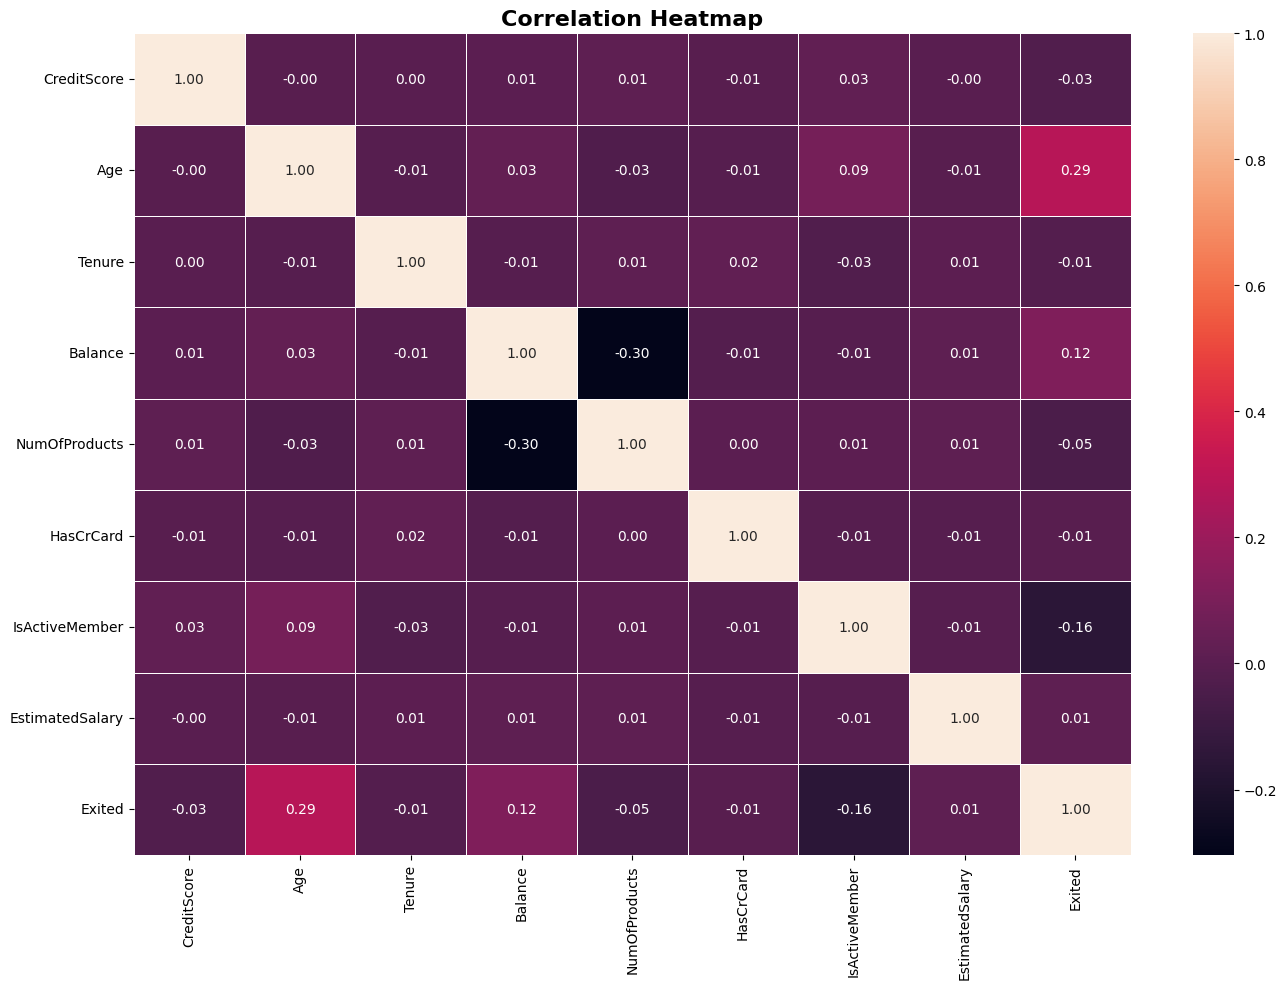

In [90]:
# Correlation ==> Heatmap
plt.figure(figsize=(14,10))
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation Heatmap", fontsize = 16, fontweight = "bold")
plt.tight_layout()
plt.show()

In [91]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
# Dependent and independent features
x = data.drop('Exited', axis=1)
y = data['Exited']

In [93]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [94]:
categorical_cols = x.select_dtypes(include = 'object').columns
numerical_cols = x.select_dtypes(exclude = 'object').columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [95]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [96]:
gender_cat = ['Female', 'Male']
geo_cat = ['France','Spain','Germany']

In [97]:
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])

cat_pipeline = Pipeline(steps=[('OrdinalEncoder', OrdinalEncoder(
    categories=[geo_cat, gender_cat]))])

preprocessor = ColumnTransformer(
    [("num_pipeline", num_pipeline, numerical_cols),
     ("cat_pipeline", cat_pipeline, categorical_cols)]
)

In [98]:
num_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [99]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_pipeline', ...), ('cat_pipeline', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feat

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [101]:
# Applying the preprocessing pipelines to the training and testing data
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns= preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns= preprocessor.get_feature_names_out())

In [102]:
x_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


Feature Engineering

In [103]:
import pickle
with open('saved_model/preprocessor.pkl',"wb") as f:
    pickle.dump(preprocessor, f)

ANN Implementation

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [105]:
x_train.shape[1]

10

In [106]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (x_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [109]:
model.compile(optimizer=opt,
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [110]:
log_dir = "logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [111]:
## Earlystopping
early_stopping_callback = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    restore_best_weights = True
) 

In [112]:
## Train model
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [tensorboard_callback, early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.4480 - accuracy: 0.8109 - val_loss: 0.3907 - val_accuracy: 0.8370
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8435 - val_loss: 0.3613 - val_accuracy: 0.8540
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8541 - val_loss: 0.3583 - val_accuracy: 0.8535
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8558 - val_loss: 0.3493 - val_accuracy: 0.8595
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8570 - val_loss: 0.3508 - val_accuracy: 0.8565
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8601 - val_loss: 0.3541 - val_accuracy: 0.8565
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8589 - val_loss: 0.3493 - val_accuracy: 0.8565

In [113]:
model.save("model.h5")

c:\Users\PRITAM MAITY\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
loss=history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

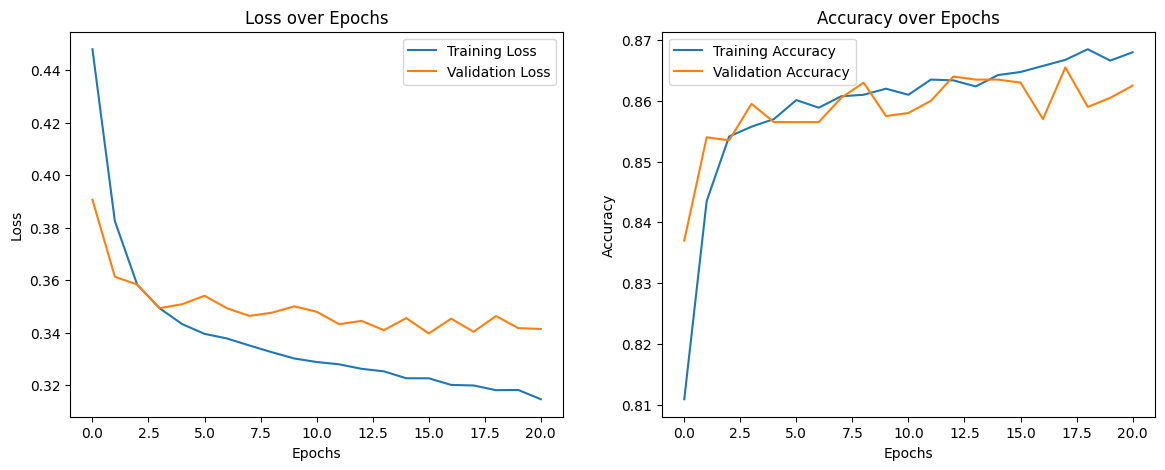

In [115]:
epochs = len(loss)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import pandas as pd
import numpy as np

In [117]:
## 🔴 CONFUSION MATRIX & CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

63/63 [==============================] - 0s 2ms/step


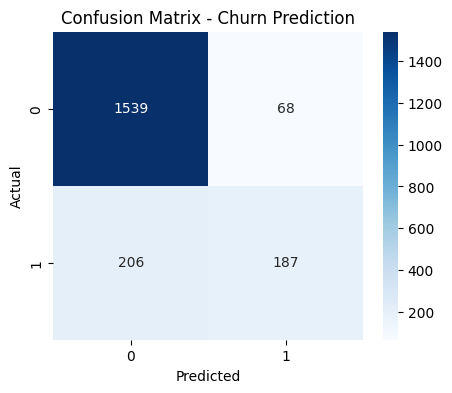

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [120]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))